# INTRODUCTION TO THE NUMPY MODULE

In [1]:
import numpy as np, matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

## SECTION 1:  ARRAYS

#### NUMBERS IN GAUSSIAN DISTRIBUTION (MEAN = 0, STD_DEV = 1)

In [2]:
gd_array = np.random.randn(100000)
gd_array

array([-1.64436745, -1.47407977, -1.74178044, ..., -0.41523531,
        0.27120178,  0.86184517])

#### LINSPACE VS ARANGE

In [8]:
lsp = np.linspace(0,10,10) # (start, end, elements) 
a_rng = np.arange(0,10,0.5) # (start, end - 1, step)
lsp, a_rng

(array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]))

### PROBLEM: NUMBERS FROM 0-10000 IN ONE LINE OF CODE (FIRST 20)

In [9]:
np.arange(0,10001,1)[(np.arange(0, 10001, 1) % 4 != 0) * (np.arange(0, 10001, 1) % 7 != 0)][:20]

array([ 1,  2,  3,  5,  6,  9, 10, 11, 13, 15, 17, 18, 19, 22, 23, 25, 26,
       27, 29, 30])

## SECTION 2: STATISTICAL FUNCTIONS AND ONE-VARIABLE CALCULUS

In [3]:
gd_array

array([-1.64436745, -1.47407977, -1.74178044, ..., -0.41523531,
        0.27120178,  0.86184517])

### MEAN AND STANDARD DEVIATION

In [11]:
np.mean(gd_array), np.std(gd_array)

(0.0012312923351709066, 1.0034333082440687)

### PROBLEM 2: PLOTTING AND FINDING NUMERICALLY THE CRITCIAL POINTS OF A FUNCTION

$$f(x)=sin(x)\,exp{\bigg (\frac{-x}{10}\bigg )}$$
Consider 10000 x-intervals in the Range [0, 10].

1. Plot $f(x)$ vs $x$ in [0, 10].
2. Compute the mean and standard deviation of $f(x)$ for $x$ values in [4, 7].
3. For $x$ in [4, 7], Find the value of $f_m(x)$ such that 80% of $f(x)$ values are less than $f_m(x)$.
4. Plot $\frac{dy}{dx}$ vs $x$ and find where $\frac{dy}{dx}$ is 0.

Text(0, 0.5, '$f(x)$')

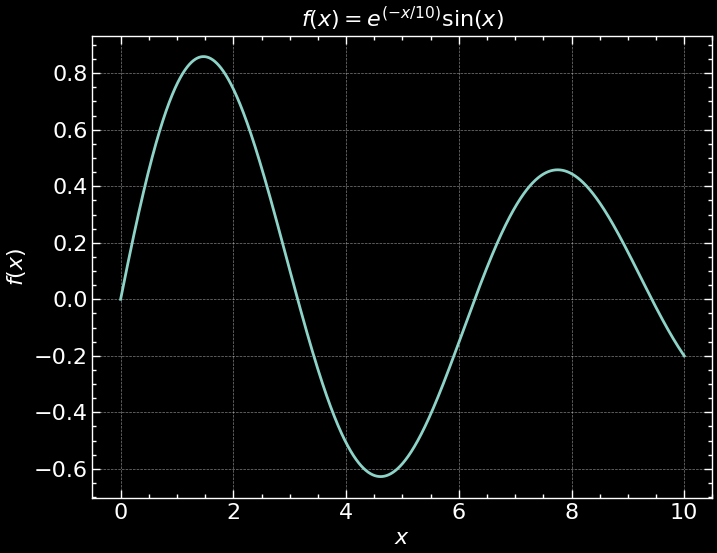

In [4]:
# 1

def f(x):
    return np.exp(-x/10) * np.sin(x)

x = np.linspace(0, 10, 10001) # 10000 POINTS, 10000 + 1 INTERVALS
y = f(x)

plt.plot(x, y)
plt.title('$f(x)=e^{(-x/10)} \sin (x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [5]:
# 2

np.mean(y[(x <= 4) * (x <= 7)]), np.std(y[(x <= 4) * (x <= 7)])

(0.36837921884923525, 0.4175152960261487)

In [6]:
# 3

np.percentile(y[(x <= 4) * (x <= 7)], 80)

0.7903085910757328

Text(0.5, 1.0, '$df/dx$ vs $x$')

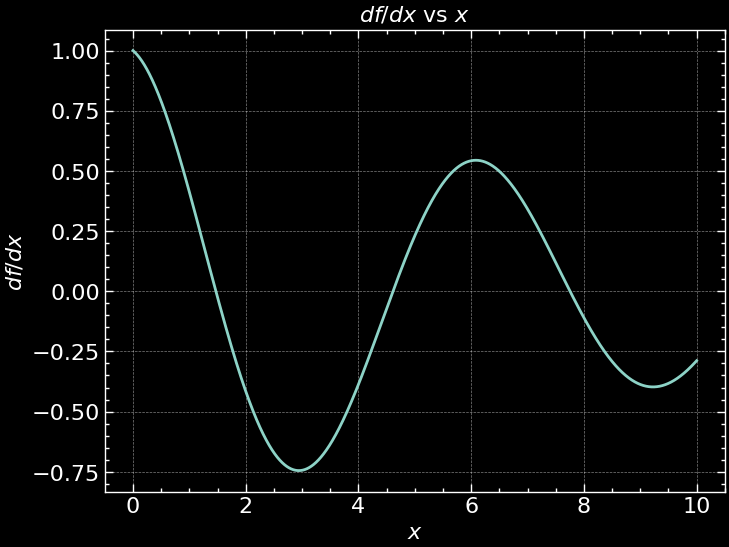

In [7]:
# 4

dydx = np.gradient(f(x), x)
int_y = np.cumsum(f(x)) * (x[1] - x[0])

plt.plot(x, dydx)
plt.xlabel('$x$')
plt.ylabel('$df/dx$')
plt.title('$df/dx$ vs $x$')

In [26]:
# 5

c_pts = x[1:][dydx[1:] * dydx[:-1] < 0]
c_pts

array([1.472, 4.613, 7.755])

### PROBLEM 3: PLOTTING A SIMPLE FLOWER PETAL

Consider the Flower Petal $\displaystyle r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $\theta \in [0, 2 \pi]$

1. Plot the Flower.
2. Find the area of the Petal using the formula for the area $\displaystyle A = \int_0^{2\pi}\frac{1}{2}r^2\,d\theta$.
3. Compute the Arclength using the formula $\displaystyle \int_0^{2\pi} \sqrt{r^2 + (\frac{dr}{d\theta})^2}\, d\theta$

Text(0, 0.5, '$r\\,\\sin\\Theta$')

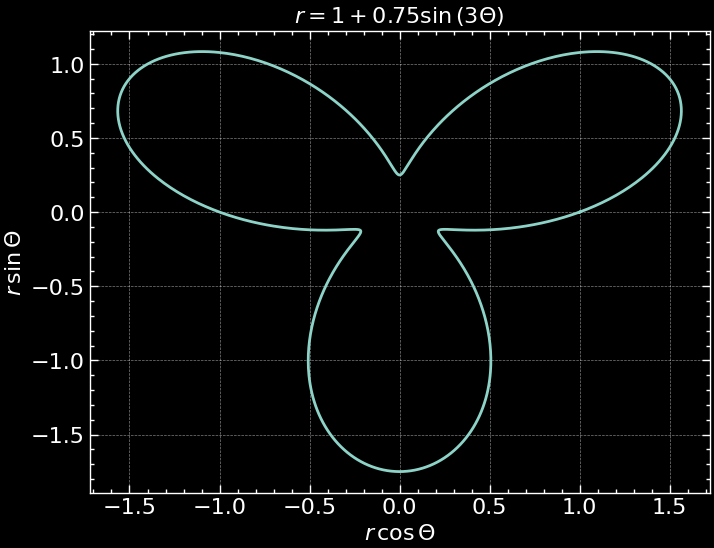

In [8]:
# 1

theta = np.linspace(0, 2 * np.pi, 1000)
r = 1 + (0.75) * np.sin(3 * theta)

plt.plot(r * np.cos(theta), r * np.sin(theta))
plt.title('$r=1+0.75 \sin{(3 \Theta)}$')
plt.xlabel('$r\,\cos\Theta$')
plt.ylabel('$r\,\sin\Theta$')

In [28]:
# 2

area = 0.5 * sum(r ** 2) * (theta[1] - theta[0])
area

4.028310324802908

In [29]:
# 3

arc = sum(np.sqrt(r ** 2 + (np.gradient(r,theta)) ** 2)) * (theta[1] - theta[0])
arc

11.640021569013872

### PROBLEM 4: TEMPERATURE AND ENERGIES OF A BLACKBODY

The Power emitted by a Blackbody is $P=A\sigma\epsilon T^4$. The Temperature of a star is given by $\displaystyle T(t)=T_0 \frac{1}{1 + e^{-k_Bt}}$. 
Plot the Total Energy emitted by the star as a function of time using the fact that $\displaystyle E(t)=\int_{t'=0}^{t'=t}P(t')\,dt$.

Text(0.5, 0, '$k_Bt$')

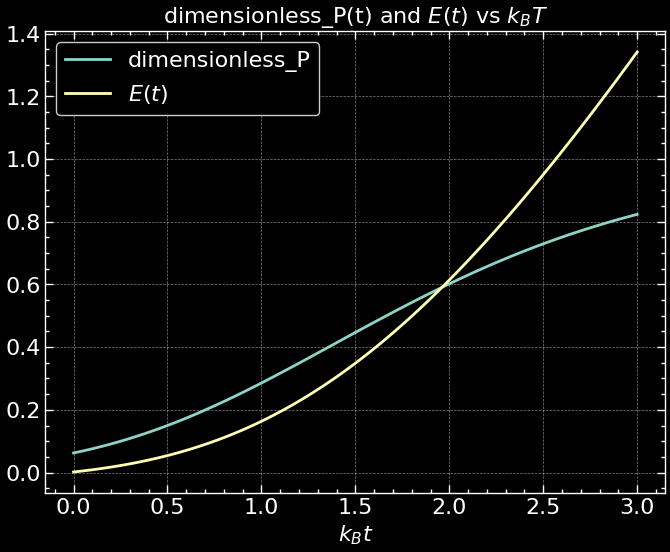

In [9]:
kT = np.linspace(0, 3, 100)
dimensionless_P = (1 / (1 + np.exp(-kT))) ** 4 # REDUCED POWER TO ACCOUNT FOR NON-DIMENSIONALITY
E = np.cumsum(dimensionless_P) * (kT[1] - kT[0])

plt.plot(kT, dimensionless_P) 
plt.plot(kT, E) 
plt.legend(['dimensionless_P', '$E(t)$'], loc = 'upper left')
plt.title('dimensionless_P(t) and $E(t)$ vs $k_BT$')
plt.xlabel('$k_Bt$')

## SECTION 3: MULTIDIMENSIONAL ARRAYS

In [35]:
a = np.array([[4, 6, 5], [1, 3, 4], [4, 3, 4]])

(array([[4, 6, 5],
        [1, 3, 4],
        [4, 3, 4]]),
 array([4, 6, 5, 1, 3, 4, 4, 3, 4]))

In [36]:
a, a.ravel()

(array([[4, 6, 5],
        [1, 3, 4],
        [4, 3, 4]]),
 array([4, 6, 5, 1, 3, 4, 4, 3, 4]))

In [37]:
a[0], a[:1]

(array([4, 6, 5]), array([[4, 6, 5]]))

### ELEMENT AND SUBMATRIX SLICING

In [38]:
a[1, 2]

4

In [39]:
a[1:, :2] # LOWER-LEFT SUBMATRIX

array([[1, 3],
       [4, 3]])

## SECTION 4: 2-VARIABLE CALCULUS

### MESHGRIDS AND CONTOURF PLOTS

Text(0, 0.5, '$y$')

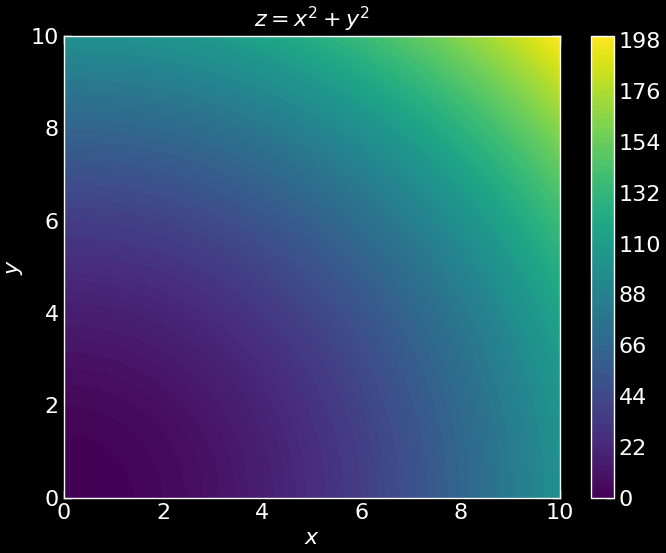

In [10]:
x_v, y_v = np.linspace(0, 10, 1000), np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_v,y_v)

Z = X ** 2 + Y ** 2

plt.contourf(X, Y, Z, levels=100) 
plt.colorbar()
plt.title('$z=x^2+y^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')

### PROBLEM 5: CONTOURF PLOT AND REGION VOLUMES OF A FUNCTION

Let $\displaystyle f(x,y)=e^{-(x^2+y^2)}\,\sin(x)$ for $x \in [-2, 2]$ and $y \in [-2, 2]$

1. Make a Contour Plot of $f(x,y)$
2. Find the Volume $|f(x,y)|$ in the specified $x$ and $y$ range.
3. Find the Volume $|f(x,y)|$ only in the region $\sqrt{x ^ 2 + y ^ 2} > 0.5$

Text(0, 0.5, '$y$')

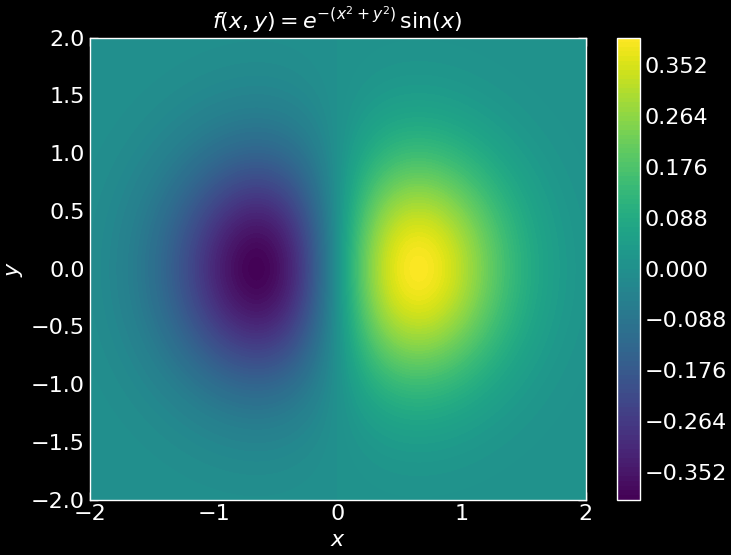

In [11]:
# 1

x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

xv, yv = np.meshgrid(x, y)
f = np.exp(-(xv ** 2 + yv ** 2)) * np.sin(xv)

plt.contourf(xv, yv, f, levels = 100)
plt.colorbar()
plt.title('$f(x,y)=e^{-(x^2+y^2)}\,\sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

In [47]:
# 2

np.abs(f.ravel()).sum() * np.diff(x)[0] * np.diff(y)[0]

1.4861858145124311

In [49]:
# 3

np.abs(f[xv ** 2 + yv ** 2 > 0.5 ** 2].ravel()).sum() * np.diff(x)[0] * np.diff(y)[0]

1.3447652930203164

## SECTION 5: LINEAR ALGEBRA

### VECTOR MULTIPLICATION,TRANSPOSE AND INVERSE 

In [59]:
A = np.array([[3,2,1],[5,-5,4],[6,0,1]])
B = np.array([1,2,3])

A @ B, A.T, np.linalg.inv(A)

(array([10,  7,  9]),
 array([[ 3,  5,  6],
        [ 2, -5,  0],
        [ 1,  4,  1]]),
 array([[-0.09433962, -0.03773585,  0.24528302],
        [ 0.35849057, -0.05660377, -0.13207547],
        [ 0.56603774,  0.22641509, -0.47169811]]))

### DOT AND CROSS PRODUCTS

In [60]:
x1 = np.array([1, 2, 3])
x2 = np.array([-4, -5, -6])

np.dot(x1, x2), np.cross(x1, x2)

(-32, array([ 3, -6,  3]))

### PROBLEM 6: COMPUTING MAGNETIC FIELD AND POYNTING VECTORS

Consider an Electric Field given by $\displaystyle \vec{E}(z,t)=E_0 \cos(z-t)\hat{x}+2E_0\cos(z-t+\pi/2)\hat{y}$.

1. Find the Magnetic Field for all $z \in [0, 4\pi]$ and $t \in [0, 10]$ using $\vec{B}(z,t)=\hat z \times \vec{E}(z,t)$ (Take $c$ = 1).
2. Compute the Poynting Vector $\vec{S}=\vec{E} \times \vec{B}$ for all $z$ and $t$. 

In [13]:
# 1

t = np.linspace(0, 10, 100)
z = np.linspace(0, 4 * np.pi, 100)

tv, zv = np.meshgrid(t, z)

In [14]:
# REDUCED ELECTRIC FIELD COMPONENTS TO ACCOMADATE FOR NON-DIMENSIONALITY:

Ex = np.cos(zv - tv)
Ey = np.cos(zv - tv + np.pi / 2)
Ez = 0 ** tv

In [15]:
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1) # TO GET ALL THREE COMPONENTS OF THE VECTOR E FOR EACH POINT
E

array([[[ 1.00000000e+00,  6.12323400e-17,  1.00000000e+00],
        [ 9.91954813e-01, -1.26592454e-01,  1.00000000e+00],
        [ 9.67948701e-01, -2.51147987e-01,  1.00000000e+00],
        ...,
        [ 9.67948701e-01,  2.51147987e-01,  1.00000000e+00],
        [ 9.91954813e-01,  1.26592454e-01,  1.00000000e+00],
        [ 1.00000000e+00,  5.51091060e-16,  1.00000000e+00]],

       [[ 9.94902816e-01,  1.00838420e-01,  0.00000000e+00],
        [ 9.99664020e-01, -2.59200322e-02,  0.00000000e+00],
        [ 9.88340255e-01, -1.52261422e-01,  0.00000000e+00],
        ...,
        [ 9.37689522e-01,  3.47474258e-01,  0.00000000e+00],
        [ 9.74133253e-01,  2.25974345e-01,  0.00000000e+00],
        [ 9.94902816e-01,  1.00838420e-01,  0.00000000e+00]],

       [[ 9.79663226e-01,  2.00648857e-01,  0.00000000e+00],
        [ 9.97182283e-01,  7.50166275e-02,  0.00000000e+00],
        [ 9.98656304e-01, -5.18226472e-02,  0.00000000e+00],
        ...,
        [ 8.97871191e-01,  4.40258247e-01,

In [16]:
B = np.cross(np.array([0, 0, 1]), E)
B = np.swapaxes(B, 0, -1)

In [17]:
Bx, By, Bz = B
B

array([[[-6.12323400e-17, -1.00838420e-01, -2.00648857e-01, ...,
          3.64598734e-01,  4.56637488e-01,  5.44021111e-01],
        [ 1.26592454e-01,  2.59200322e-02, -7.50166275e-02, ...,
          2.43787040e-01,  3.40340416e-01,  4.33424236e-01],
        [ 2.51147987e-01,  1.52261422e-01,  5.18226472e-02, ...,
          1.19052722e-01,  2.18567139e-01,  3.15853402e-01],
        ...,
        [-2.51147987e-01, -3.47474258e-01, -4.40258247e-01, ...,
          5.86773020e-01,  6.65436187e-01,  7.37315653e-01],
        [-1.26592454e-01, -2.25974345e-01, -3.23052570e-01, ...,
          4.79543897e-01,  5.65587091e-01,  6.45864483e-01],
        [-5.51091060e-16, -1.00838420e-01, -2.00648857e-01, ...,
          3.64598734e-01,  4.56637488e-01,  5.44021111e-01]],

       [[ 1.00000000e+00,  9.94902816e-01,  9.79663226e-01, ...,
         -9.31164735e-01, -8.89652856e-01, -8.39071529e-01],
        [ 9.91954813e-01,  9.99664020e-01,  9.97182283e-01, ...,
         -9.69828789e-01, -9.40302293e

In [18]:
# 2

B = np.swapaxes(B, 0, -1)

S = np.cross(E, B)  # UMOV-POYNTING VECTOR (S = E X B)
S = np.swapaxes(S, 0, -1)

Sx, Sy, Sz = S
Sz # S_x and S_y are NULL

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

Text(0.5, 0, '$t$')

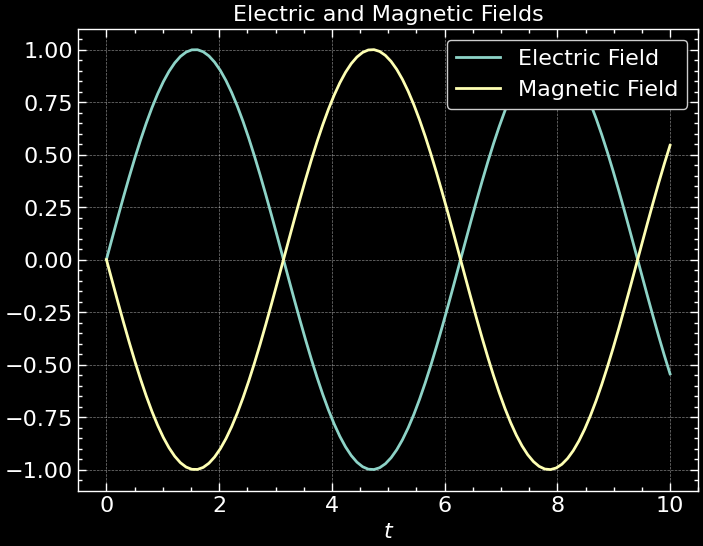

In [19]:
plt.plot(t, Ey[0]) 
plt.plot(t, Bx[0]) 
plt.legend(['Electric Field', 'Magnetic Field'], loc = "upper right")
plt.title('Electric and Magnetic Fields')
plt.xlabel('$t$')

### SYSTEMS OF EQUATIONS

In [20]:
A = np.array([[3, 2, 3, 10], [2, -2, 5, 8], [3, 3, 4, 9], [3, 4, -3, -7]])
B = np.array([4, 1, 3, 2])

np.linalg.solve(A, B)

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

### EIGENVALUES AND EIGENVECTORS OF A VECTOR 

In [92]:
V = np.array([[4,2,2],[2,4,2],[2,2,4]])
eig_value, eig_vector = np.linalg.eig(V)
eig_value, eig_vector

(array([2., 8., 2.]),
 array([[-0.81649658,  0.57735027,  0.50669854],
        [ 0.40824829,  0.57735027, -0.80782419],
        [ 0.40824829,  0.57735027,  0.30112565]]))

### PROBLEM: EIGENVECTORS AS SOLUTIONS OF A SECOND-ORDER DIFFERENTIAL EQUATION 

Find the solutions to $\displaystyle (\frac{d^2}{dx^2}+(10x)^2)f=\lambda f$ with the boundary conditions $f(0)=f(1)=0$. 
- Use the Eigenvalue method and the fact that $\displaystyle \frac{d^2f}{dx^2} \approx \frac{f_{j+1}+f_{j-1}-2f_j}{\delta x^2}$ where $f_j=f(j\,\delta x)$ and $j$ is an integer.

In [21]:
N = 1000
x = np.linspace(0, 1, N + 1)

main_diag = -2 * np.ones(N - 1)
off_diag = np.ones(N - 2)

In [22]:
L_matrix = (np.diag(main_diag) + np.diag(off_diag, - 1) +
            np.diag(off_diag, 1)) / (x[1] - x[0]) ** 2 + np.diag((10 * x[1:-1]) ** 2)

In [23]:
w, v = np.linalg.eigh(L_matrix)
w # EIGENVALUES OF f

array([-3.99996995e+06, -3.99992814e+06, -3.99987674e+06, -3.99980784e+06,
       -3.99971929e+06, -3.99961091e+06, -3.99948273e+06, -3.99933478e+06,
       -3.99916707e+06, -3.99897962e+06, -3.99877242e+06, -3.99854549e+06,
       -3.99829883e+06, -3.99803245e+06, -3.99774634e+06, -3.99744051e+06,
       -3.99711497e+06, -3.99676971e+06, -3.99640475e+06, -3.99602008e+06,
       -3.99561571e+06, -3.99519164e+06, -3.99474788e+06, -3.99428444e+06,
       -3.99380131e+06, -3.99329850e+06, -3.99277601e+06, -3.99223386e+06,
       -3.99167205e+06, -3.99109058e+06, -3.99048945e+06, -3.98986868e+06,
       -3.98922827e+06, -3.98856823e+06, -3.98788856e+06, -3.98718927e+06,
       -3.98647037e+06, -3.98573186e+06, -3.98497376e+06, -3.98419606e+06,
       -3.98339878e+06, -3.98258192e+06, -3.98174549e+06, -3.98088951e+06,
       -3.98001397e+06, -3.97911890e+06, -3.97820428e+06, -3.97727015e+06,
       -3.97631650e+06, -3.97534334e+06, -3.97435069e+06, -3.97333855e+06,
       -3.97230693e+06, -

Text(0.5, 1.0, 'Distribution of Eigenvalues of $f$')

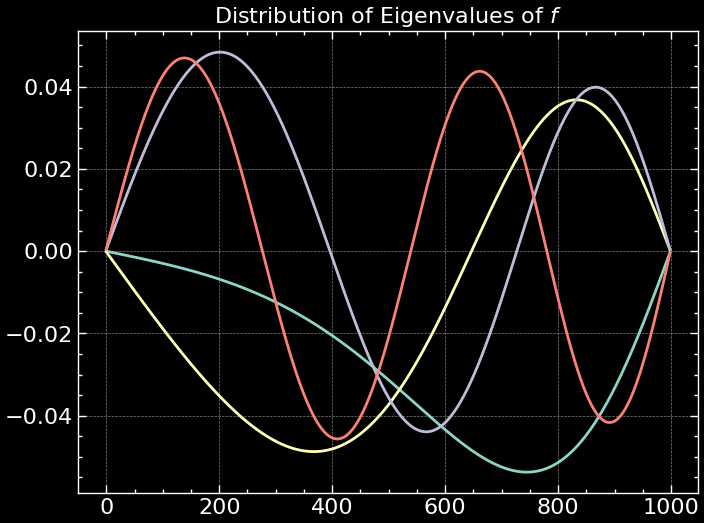

In [24]:
plt.plot(v[:,-1]) # IN NUMPY, EIGENVALUES ARE DISPLAYED IN DECREASING ORDER, SO THIS CORRESPONDS TO THE SMALLEST EIGENVALUE.
plt.plot(v[:,-2]) # THE PLOTS REPRESENT DISCRETE FORMS OF f.
plt.plot(v[:,-3])
plt.plot(v[:,-4])

plt.title('Distribution of Eigenvalues of $f$')